In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks, butter, filtfilt
from scipy.ndimage import gaussian_filter1d

In [3]:
# import data
data_d = pd.read_csv('silver/covid_data.csv')
data_w = pd.read_csv('silver/covid_data_weekly.csv')
data_m = pd.read_csv('silver/covid_data_monthly.csv')

In [4]:
# Split curves with peaks function
def find_peak_indexes(signal, smooth_sigma=2, prominence=0.1, min_distance=10):
    # Compute autocorrelation
    autocorr = np.correlate(signal, signal, mode='full')
    autocorr = autocorr[len(autocorr)//2:]  # Take only positive lags

    # Smooth the autocorrelation
    smoothed_autocorr = gaussian_filter1d(autocorr, sigma=smooth_sigma)

    # Detect peaks in the autocorrelation
    peaks, _ = find_peaks(smoothed_autocorr, prominence=prominence, distance=min_distance)

    return peaks

# Daily splits

Sample

In [5]:
data_d.head()

,state,country,lat,long,date,cases,new_cases
0,NaN,Brazil,-14.235,-51.9253,2020-01-22,0,0
1,NaN,Brazil,-14.235,-51.9253,2020-01-23,0,0
2,NaN,Brazil,-14.235,-51.9253,2020-01-24,0,0
3,NaN,Brazil,-14.235,-51.9253,2020-01-25,0,0
4,NaN,Brazil,-14.235,-51.9253,2020-01-26,0,0


In [8]:
df_d_col = data_d[data_d['country'] == 'Colombia'].copy().reset_index(drop=True)
df_d_col.head()

,state,country,lat,long,date,cases,new_cases
0,NaN,Colombia,4.5709,-74.2973,2020-01-22,0,0
1,NaN,Colombia,4.5709,-74.2973,2020-01-23,0,0
2,NaN,Colombia,4.5709,-74.2973,2020-01-24,0,0
3,NaN,Colombia,4.5709,-74.2973,2020-01-25,0,0
4,NaN,Colombia,4.5709,-74.2973,2020-01-26,0,0


In [10]:
peaks_col = find_peak_indexes(df_d_col['new_cases'])
peaks_col

array([202, 363, 433, 525, 642, 657, 672, 686, 700, 713, 727, 761, 782,
       803, 817, 832, 847, 861, 887])

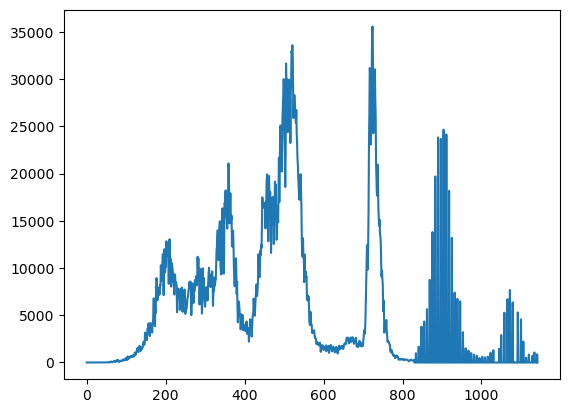

In [20]:
df_sample = df_d_col.iloc[0:len(df_d_col)]
df_sample['date'] = pd.to_datetime(df_sample['date'])
plt.plot(df_sample.index, df_sample.new_cases)


In [ ]:
import os
if not os.path.exists("gold"): 
    os.makedirs("gold") 

Peak regions (start index, end index): [(np.int64(11), np.int64(13)), (np.int64(14), np.int64(16)), (np.int64(17), np.int64(19)), (np.int64(20), np.int64(22)), (np.int64(23), np.int64(25)), (np.int64(28), np.int64(30)), (np.int64(31), np.int64(33)), (np.int64(33), np.int64(35)), (np.int64(35), np.int64(38)), (np.int64(41), np.int64(43)), (np.int64(44), np.int64(46)), (np.int64(48), np.int64(50)), (np.int64(50), np.int64(52)), (np.int64(54), np.int64(56)), (np.int64(56), np.int64(58)), (np.int64(60), np.int64(62)), (np.int64(62), np.int64(65)), (np.int64(65), np.int64(67)), (np.int64(67), np.int64(69)), (np.int64(69), np.int64(71)), (np.int64(72), np.int64(75)), (np.int64(76), np.int64(78)), (np.int64(76), np.int64(80)), (np.int64(81), np.int64(83)), (np.int64(86), np.int64(88)), (np.int64(88), np.int64(90)), (np.int64(90), np.int64(93)), (np.int64(94), np.int64(96)), (np.int64(96), np.int64(99)), (np.int64(100), np.int64(102)), (np.int64(102), np.int64(104)), (np.int64(105), np.int64(1

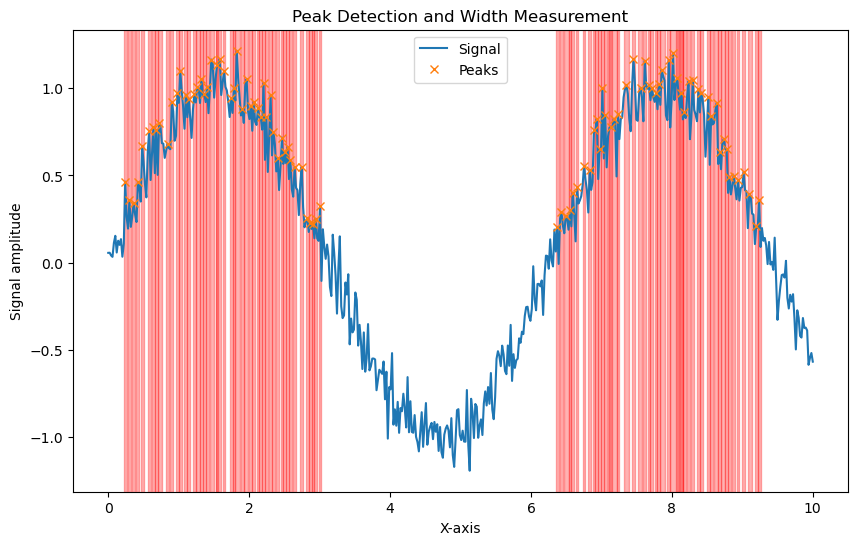

In [23]:
import numpy as np
from scipy.signal import find_peaks, peak_widths
import matplotlib.pyplot as plt

# Example data: Replace this with your actual signal
x = np.linspace(0, 10, 500)
data = np.sin(x) + np.random.normal(0, 0.1, x.shape)

# 1. Find peaks in the signal (adjust height threshold as needed)
peaks, properties = find_peaks(data, height=0.2)

# 2. Compute peak widths at half prominence (relative height of 0.5)
results_half = peak_widths(data, peaks, rel_height=0.2)
widths = results_half[0]        # Widths of the peaks
left_ips = results_half[2]      # Left interpolated positions (fractional indices)
right_ips = results_half[3]     # Right interpolated positions (fractional indices)

# 3. Convert fractional indices to integer indices for capturing full peaks
left_indices = np.floor(left_ips).astype(int)
right_indices = np.ceil(right_ips).astype(int)

# Save peak regions as (start_index, end_index) for each peak
peak_regions = [(left_indices[i], right_indices[i]) for i in range(len(peaks))]
print("Peak regions (start index, end index):", peak_regions)

# Optional: Plot the results for visualization
plt.figure(figsize=(10, 6))
plt.plot(x, data, label='Signal')
plt.plot(x[peaks], data[peaks], "x", label='Peaks')

# Highlight each peak region
for (start, end) in peak_regions:
    plt.axvspan(x[start], x[end], color='red', alpha=0.3)

plt.xlabel("X-axis")
plt.ylabel("Signal amplitude")
plt.legend()
plt.title("Peak Detection and Width Measurement")
plt.show()
